In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def train_test_split(X, y, p):
    if X.shape[0] != y.shape[0]:
        raise ValueError("X và y phải có số lượng mẫu bằng nhau.")

    N = X.shape[0]
    train_size = int(N * p)

    indices = np.random.permutation(N) # hoan vi ngau nhien chi so mang

    train_indices = indices[:train_size] # lay chi so train data
    test_indices = indices[train_size:] # lay chi so test data

    # phan chia du lieu
    X_train = X[train_indices, :]
    X_test = X[test_indices, :]
    y_train = y[train_indices, :]
    y_test = y[test_indices, :]
    return X_train, X_test, y_train, y_test


In [3]:
class PLA:
    def __init__(self, X, y, w):
        self.X = X
        self.y = y
        self.w = w
        self.N = X.shape[0]
        
    def visualize(self):
        X_pos = []
        X_neg = []
        for i in range(self.N):
            if self.y[i] == 1:
                X_pos.append(self.X[i])
            else:
                X_neg.append(self.X[i])
        X_pos = np.array(X_pos)
        X_neg = np.array(X_neg)
        plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', label='Class 1')
        plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', label='Class -1')
        x1_hyper = np.linspace(-5, 5, 100)
        x2_hyper = -(self.w[0] + self.w[1]*x1_hyper)/self.w[2]
        plt.plot(x1_hyper, x2_hyper, color='green', label='Hyperplane')
        plt.legend()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perfectly Separable Data')
        plt.show()
        

    def dynamic_visualize(self, ite):
        if ite == 0:  # Chỉ khởi tạo đồ thị lần đầu
            self.fig, self.ax = plt.subplots(figsize=(8, 6))
            X_pos = self.X[self.y == 1]
            X_neg = self.X[self.y == -1]

            # Vẽ dữ liệu
            self.ax.scatter(X_pos[:, 0], X_pos[:, 1], color='red', label='Class 1')
            self.ax.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', label='Class -1')
            self.ax.legend()
            self.ax.set_xlabel('Feature 1')
            self.ax.set_ylabel('Feature 2')
            self.ax.set_title('Perceptron Learning Algorithm')
            self.ax.set_xlim(-5, 5)
            self.ax.set_ylim(-5, 5)

            # Giữ chỗ cho siêu phẳng và thông tin iteration
            self.hyperplane, = self.ax.plot([], [], color='green', label='Hyperplane')
            self.iteration_text = self.ax.text(-4.5, 4.5, '', fontsize=12, color='black')

        # Tính toán siêu phẳng
        x1_hyper = np.linspace(-5, 5, 100)
        x2_hyper = -(self.w[0] + self.w[1] * x1_hyper) / self.w[2]

        # Cập nhật siêu phẳng và thông tin iteration
        self.hyperplane.set_data(x1_hyper, x2_hyper)
        self.iteration_text.set_text(f"Iteration: {ite}")

        plt.pause(2)  # Tạm dừng để quan sát

    def sgn(self, i):
        return 1 if np.dot(self.w, np.append([1], self.X[i, :])) >= 0 else -1

    def misclassified_points(self):
        return [i for i in range(self.N) if self.sgn(i) != self.y[i]]

    def pla(self):
        ite = 0
        # plt.ion()  # Bật chế độ vẽ tương tác
        # self.visualize(ite)  # Hiển thị lần đầu
        while True:
            mis_pts = self.misclassified_points()
            if len(mis_pts) == 0:
                break
            i = mis_pts[0]  # Chọn điểm đầu tiên trong danh sách misclassified
            self.w += self.y[i] * np.append([1], self.X[i, :])  # Cập nhật trọng số
            ite += 1
            # self.visualize(ite)  # Cập nhật đồ thị
        # plt.ioff()  # Tắt chế độ vẽ tương tác
        self.visualize()
        plt.show()
        print(f"Training completed in {ite} iterations")

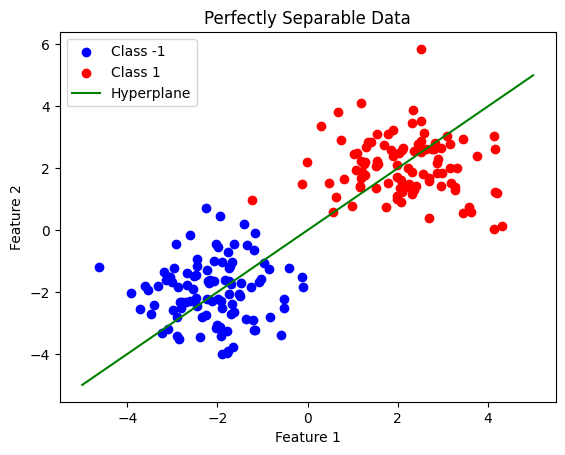

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Đặt seed cố định để tái hiện kết quả
np.random.seed(42)

# Số lượng điểm dữ liệu mỗi lớp
num_points = 100
num_features = 2

# Tạo dữ liệu lớp -1
X_neg = np.random.randn(num_points, num_features) - [2, 2] 
y_neg = -1 * np.ones(num_points)  # Nhãn lớp -1

# Tạo dữ liệu lớp 1
X_pos = np.random.randn(num_points, num_features) + [2, 2] 
y_pos = np.ones(num_points)  # Nhãn lớp 1

# Kết hợp hai lớp dữ liệu
X = np.vstack((X_neg, X_pos))
y = np.hstack((y_neg, y_pos))
w = [0, 1, -1]

# Vẽ biểu đồ scatter
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', label='Class -1')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', label='Class 1')

# Vẽ siêu phẳng phân tách (x = y là siêu phẳng)

x1 = np.linspace(-5, 5, 1000)
x2 = -(w[0] + w[1]*x1)/w[2]
plt.plot(x1, x2, color='green', label='Hyperplane')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perfectly Separable Data')
plt.show()

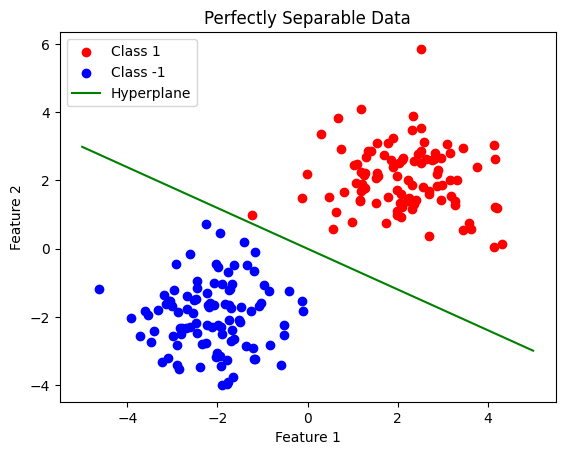

Training completed in 2 iterations


In [7]:
a = PLA(X, y, w)
a.pla()
